### Implementation of Multiple Linear Regression using Housing Price dataset

Data Source: [Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [48]:
#read dataset
housing = pd.read_csv('Housing.csv')
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [49]:
#all column names
housing.columns.values

array(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'], dtype=object)

In [50]:
#different ways of viewing column names

#values returned are of pandas index type
type(housing.columns)
#values returned are of numpy array type
type(housing.columns.values)
#values returned are of type list
type(housing.columns.values.tolist())

list

In [51]:
#subset dataset with relevant columns
housing_subset = housing.loc[:,('price','area','bedrooms','bathrooms','stories')]

In [52]:
#view subset
housing_subset.head(5)

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2


In [53]:
#descriptive summary statistics
housing_subset.describe()

,price,area,bedrooms,bathrooms,stories
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000


In [54]:
#function to normalize the dataframe
def zscore_normalization(df):
    """
    Objective- Normalize the variables of dataframe.
    Argument-
    df (nd-array)- m observations, n variables.
    Returns-
    df_norm- Normalized dataframe
    mean_norm (1-d array)- mean of each variable (n)
    sd_norm (1-d array)- standard deviation of each variable (n)
    """
    col_mean = np.mean(df, axis = 0)
    col_sd = np.std(df, axis = 0)
    df1 = df - col_mean
    df2 = df1/col_sd
    
    return (df2, col_mean, col_sd)

In [55]:
train_data, mu, sd = zscore_normalization(housing_subset)

In [56]:
train_data.describe()

,price,area,bedrooms,bathrooms,stories
count,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02
mean,2.085997e-16,-1.564498e-16,-1.825247e-16,-2.607496e-17,-1.303748e-16
std,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00
min,-1.614327e+00,-1.614530e+00,-2.665004e+00,-5.701867e-01,-9.293967e-01
25%,-7.153170e-01,-7.151451e-01,-1.308863e+00,-5.701867e-01,-9.293967e-01
50%,-2.283534e-01,-2.539222e-01,4.727831e-02,-5.701867e-01,2.244101e-01
75%,5.208214e-01,5.578300e-01,4.727831e-02,1.421812e+00,2.244101e-01
max,4.566365e+00,5.096263e+00,4.115701e+00,5.405809e+00,2.532024e+00


xtrain & ytrain are pandas dataframe. Hence, slicing done in this manner.  
It is required to use either **`.loc[]`** or **`.iloc[]`** function to fetch the columns.

In [57]:
#split in xtrain and target output
xtrain = train_data.loc[:,('area','bedrooms','bathrooms','stories')]
ytrain = train_data.loc[:,'price']

In [58]:
xtrain.head(5)

,area,bedrooms,bathrooms,stories
0,1.046726,1.403419,1.421812,1.378217
1,1.757010,1.403419,5.405809,2.532024
2,2.218232,0.047278,1.421812,0.224410
3,1.083624,1.403419,1.421812,0.224410
4,1.046726,1.403419,-0.570187,0.224410


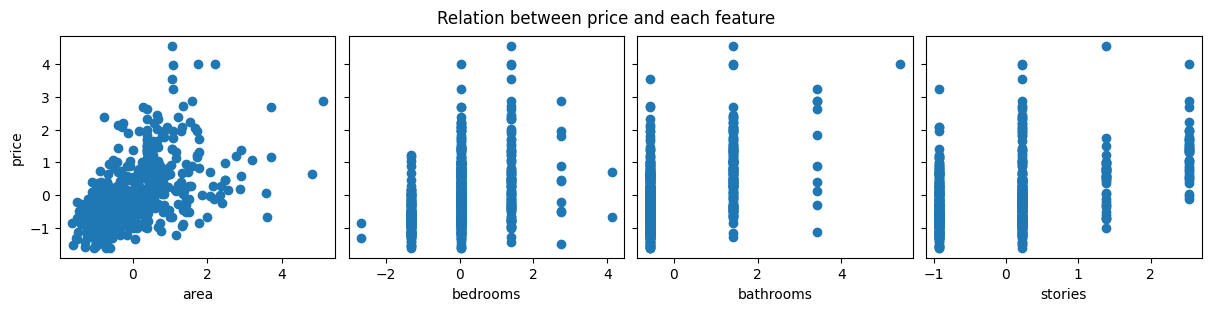

In [59]:
#plotting price vs each variable

#extract column names from xtrain dataset
feature_name = xtrain.columns.values.tolist()
#create a figure with 1 row and 4 columns- for 4 subplots, yaxis label shared by all subplots.
fig, ax = plt.subplots(1,4, figsize = (12,3), constrained_layout = True, sharey = True)
for i in range(len(ax)):
    #scatter plot of each feature vs price of house
    ax[i].scatter(xtrain.iloc[:,i],ytrain)
    ax[i].set_xlabel(feature_name[i])
#ylabel on 1st subplot, shared by all 4 subplots in row.
ax[0].set_ylabel('price')
fig.suptitle("Relation between price and each feature")
plt.show()

There seems to be a positive correlation between Price and Area of the house.

In [60]:
#function to compute cost
def compute_cost(xtrain, ytrain, w, b):
    """
    Objective- compute the least squared error cost function
    Arguments-
    xtrain (2-D matrix)- matrix with training samples;m observations, n features
    ytrain (1-D vector)- target outputs, m samples
    w (1-D vector)- weights parameters, n features
    b (scalar)- error (bias) parameter
    Returns-
    cost (scalar)- least squared error
    """
    m,n = xtrain.shape
    cost = 0.0
    for i in range(m):
        fx = np.dot(xtrain.iloc[i,:],w) + b
        error = fx - ytrain[i]
        cost = cost + error**2
    cost = cost/(2*m)
    return cost

In [61]:
#function to compute gradient
def compute_gradient(xtrain, ytrain, w, b):
    """
    Objective- compute partial derivative of least squared cost w.r.t parameters
    Arguments-
    xtrain (2-D matrix)- matrix with training samples;m observations, n features
    ytrain (1-D vector)- target outputs, m samples
    w (1-D vector)- weights parameters, n features
    b (scalar)- error (bias) parameter
    Returns-
    dj_dw (1-D vector)- partial derivative of weights
    dj_db (scalar)- partial derivative of b
    """
    m,n = xtrain.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        fx = np.dot(xtrain.iloc[i,:],w) + b
        err = fx - ytrain[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*xtrain.iloc[i,j]
        dj_db = dj_db + err
    #calculate average
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [62]:
#function to implement gradient descent algorithm
def gradient_descent(xtrain, ytrain, w, b, alpha, iters, compute_cost, compute_gradient):
    """
    Objective- implement GD algo for given number of iterations.
    Arguments-
    xtrain, ytrain- training samples
    w, b- parameters
    alpha- learning rate
    iters- number of iterations
    compute_cost, compute_gradient- pre-defined functions
    Returns-
    final_w (1-D array, n values)- weight parameters after training
    final_b (scalar)- final bias value after training
    J_history (nested list)- cost history; iteration index and cost at each step
    w_history (nested list)- weights history at each iteration.
    b_history (simple list)- bias history at each iteration
    """
    
    #preserve the original w and b
    w_in, b_in = w, b
    
    #empty list to store cost, parameters at each step
    J_history = []
    w_history = []
    b_history = []
    
    #run GD for 'iters' number of steps
    for i in range(iters):
            
        #compute gradient
        dj_dw, dj_db = compute_gradient(xtrain, ytrain, w_in, b_in)
        
        #update weights
        w_in = w_in - alpha*dj_dw
        b_in = b_in - alpha*dj_db
        
        #store cost and parameter values at each iteration
        #checking for number of steps prevents resource exhaustion
        if i < 100000:
            J_history.append((i, compute_cost(xtrain,ytrain,w_in,b_in)))
            w_history.append(w_in)
            b_history.append(b_in)
        
        #print cost at some fixed intervals
        if i%math.ceil(iters/10) == 0:
            print(f"Iteration: {i}", 
                  f"Cost: {J_history[-1][1]:.3e}")
    
    return J_history, w_history, b_history, w_in, b_in

In [63]:
#some iniatizations
alpha = 0.01
iters = 700
#create vector with values 0, number of values = number of features in training dataset.
w = np.zeros(xtrain.shape[1])
b = 0

In [64]:
#call gradient descent
J_history, w_history, b_history, final_w, final_b = gradient_descent(xtrain, ytrain, w, b, 
                                                               alpha, iters, compute_cost, compute_gradient)

Iteration: 0 Cost: 4.914e-01
Iteration: 70 Cost: 2.643e-01
Iteration: 140 Cost: 2.385e-01
Iteration: 210 Cost: 2.340e-01
Iteration: 280 Cost: 2.328e-01
Iteration: 350 Cost: 2.324e-01
Iteration: 420 Cost: 2.323e-01
Iteration: 490 Cost: 2.322e-01
Iteration: 560 Cost: 2.322e-01
Iteration: 630 Cost: 2.322e-01


- **`J_history`** is a nested list object.  
- It is of following format: **[(iteration1, cost at iteration1), (iteration2, cost at iteration2),...]**  
- In order to use the cost and iteration count easily while creating plots, it has been converted to a numpy 2-D array and stored in **`cost_history`**.

In [65]:
#covert J_history from nested list to numpy array for easier manipulation
cost_history = np.array(J_history)

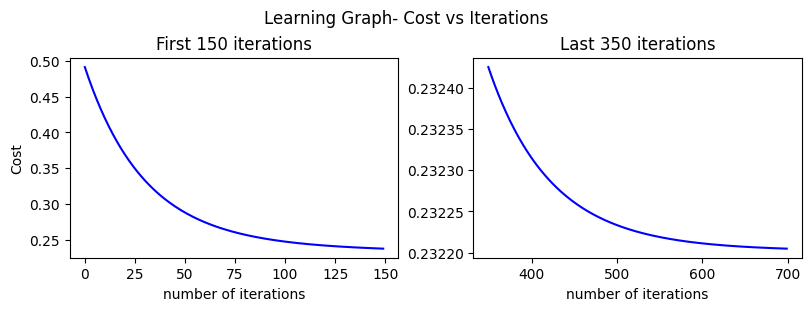

In [66]:
#plot of Cost vs. number of iterations
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (8,3))

#subplot1- first 150 iterations
ax[0].plot(cost_history[0:150,0], cost_history[0:150,1], c = "blue")
ax[0].set_xlabel('number of iterations')
ax[0].set_ylabel('Cost')
ax[0].set_title('First 150 iterations')

#subplot 2- last 500 iterations
ax[1].plot(cost_history[349:,0], cost_history[349:,1], c = "blue")
ax[1].set_xlabel('number of iterations')
ax[1].set_title('Last 350 iterations')

#title of entire figure
fig.suptitle('Learning Graph- Cost vs Iterations')

plt.show()

Below, trained parameters **final_w** & **final_b** have been used to compute the linear model's output using the same training samples.  
This output will be used to visualize how well the model getstrained, to fit the training dataset, in the subsequent plot.

In [67]:
#compute model output using same training samples but trained parameters
m,n = xtrain.shape
fx = np.zeros_like(ytrain)
for i in range(m):
    fx[i] = np.dot(xtrain.iloc[i,:], final_w) + final_b

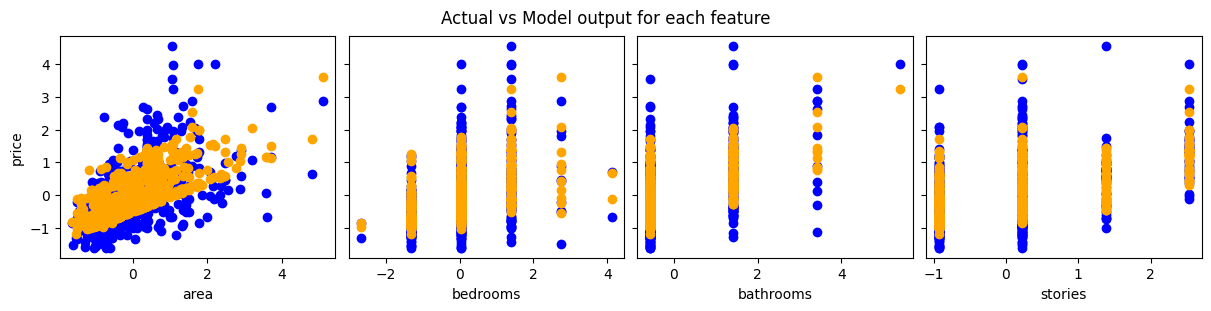

In [68]:
#Actual output vs model output on training samples
fig, ax = plt.subplots(1,4, constrained_layout = True, sharey = True, figsize = (12, 3))

for i in range(len(ax)):
    #scatter plot with original data
    ax[i].scatter(xtrain.iloc[:,i], ytrain, c = "blue")
    #scatter plot with model output
    ax[i].scatter(xtrain.iloc[:,i], fx, c = "orange")
    #subplot title
    ax[i].set_xlabel(feature_name[i])

#set y axis label
ax[0].set_ylabel('price')

#set title for entire figure
fig.suptitle('Actual vs Model output for each feature')

plt.show()

- **`mu`** & **`sd`** are pandas dataframe containing column mean and column standard deviation computed during Z-Score normalization of **housing** dataset.  
- They were returned by the **`zscore_normalization()`** function defined at the beginning of this notebook.  
- These same parameters will be used to normalize the test data sample below.  
- These normalized values will then be used to compute the model's output using **final_w** & **final_b**.  

- Both **mu** and **sd** contain 5 values. The first value is mean and standard deviation for **price**. The dataframe sent to **`zscore_normalization()`** function contained **price** in first column.  
- Our test sample contains 4 feature values and price will be computed by model. Hence, **`mu[1:5]`** and **`sd[1:5]`** remove the first element- mean of price, sd of price.

In [69]:
#make prediction for a test sample
test_x = np.array([[9500, 3, 3, 2],[8100, 2, 2, 1], [13500, 5, 3, 3]])
#converting the numpy array to pandas dataframe
test_x = pd.DataFrame(test_x, columns = ['area', 'bedrooms', 'bathrooms', 'stories'])

#removing the 1st value 'price' from zscore mean and standard deviation.
norm_mean = mu[1:5]
norm_sd = sd[1:5]

#normalize the test data
test_x = test_x - norm_mean
test_x = test_x/norm_sd

In [70]:
#model prediction
m, n = test_x.shape
test_y = np.zeros(m)
for i in range(m):
    test_y[i] = np.dot(test_x.iloc[i,:], final_w) + final_b

#output values
test_y

array([2.04026747, 0.72305785, 3.35429137])

The plot below contains:  
- **Yellow**: Scatter plot of each feature vs price of house, as seen in original dataset.  
- **Light blue**: Overlapping the above plot, is our linear model's output using final weights and parameters, after running GD algo.  
- **Red**: Model's output for the 3 test samples.

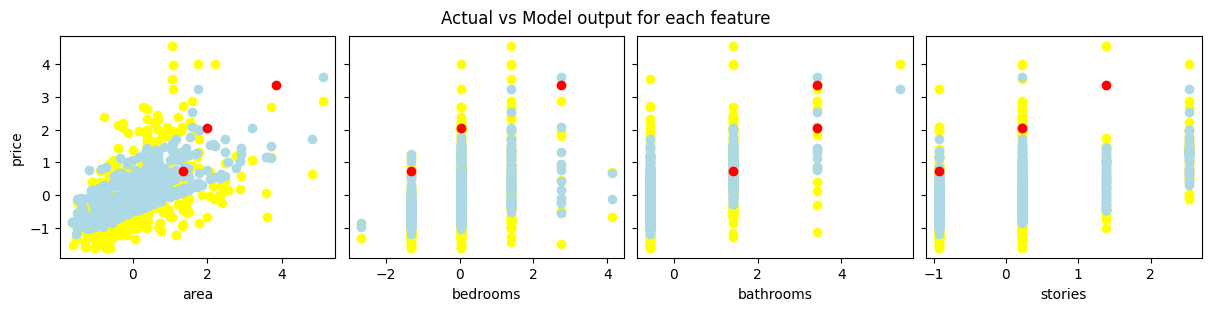

In [71]:
#Actual output vs model output on training samples
fig, ax = plt.subplots(1,4, constrained_layout = True, sharey = True, figsize = (12, 3))

for i in range(len(ax)):
    #scatter plot with original data
    ax[i].scatter(xtrain.iloc[:,i], ytrain, c = "yellow")
    #scatter plot with model output
    ax[i].scatter(xtrain.iloc[:,i], fx, c = "lightblue")
    #subplot title
    ax[i].set_xlabel(feature_name[i])

#set y axis label
ax[0].set_ylabel('price')

#highlighting our test sample
for i in range(len(ax)):
    ax[i].scatter(test_x.iloc[:,i], test_y, c = "red")

#set title for entire figure
fig.suptitle('Actual vs Model output for each feature')

plt.show()

As we can see, the model gives pretty good output.  
To summarize:  
- As only area shows positive correlation with price, multicollinearity issue was not found in the dataset.  
- Using learning rate = 0.001 caused the Gradient descent to converge very slowly.  
- Initially, training was done with 1000 iterations, using alpha=0.01. Cost became constant at around 490-500 iterations.  
- So, I reduced the number of iterations to 700, as GD converged by this step.  